In [2]:
import matplotlib.pyplot as plt
import pickle as pk 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.float_format = '{:,.2f}'.format
# Load the dataset
cars_data = pd.read_csv('Cardetails.csv')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Clean the data (remove unwanted columns, handle missing data, etc.)
cars_data.drop(columns=['torque'], inplace=True)

# Functions for data cleaning
def get_brand_name(car_name):
    if isinstance(car_name, str):
        return car_name.split(' ')[0].strip()
    else:
        return car_name  # If it's not a string, return it as is

def clean_data(value):
    if isinstance(value, str):  # Check if the value is a string
        cleaned_value = value.split(' ')[0].strip()  # Split and clean the string
        return float(cleaned_value) if cleaned_value != '' else 0
    else:
        return value  # If it's already a number, return it as is

In [ ]:
# Apply the cleaning functions
cars_data['name'] = cars_data['name'].apply(get_brand_name)
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [ ]:
# Fill missing values
cars_data.loc[:, 'mileage'] = cars_data['mileage'].fillna(cars_data['mileage'].median())
cars_data.loc[:, 'max_power'] = cars_data['max_power'].fillna(cars_data['max_power'].median())
cars_data.loc[:, 'engine'] = cars_data['engine'].fillna(cars_data['engine'].median())
cars_data.loc[:, 'seats'] = cars_data['seats'].fillna(cars_data['seats'].median())

cars_data.loc[:, 'name'] = cars_data['name'].fillna(cars_data['name'].mode()[0])
cars_data.loc[:, 'fuel'] = cars_data['fuel'].fillna(cars_data['fuel'].mode()[0])
cars_data.loc[:, 'seller_type'] = cars_data['seller_type'].fillna(cars_data['seller_type'].mode()[0])
cars_data.loc[:, 'transmission'] = cars_data['transmission'].fillna(cars_data['transmission'].mode()[0])
cars_data.loc[:, 'owner'] = cars_data['owner'].fillna(cars_data['owner'].mode()[0])

In [ ]:
brand_mapping = {
    'Maruti': 1, 'Skoda': 2, 'Honda': 3, 'Hyundai': 4, 'Toyota': 5, 'Ford': 6,
    'Renault': 7, 'Mahindra': 8, 'Tata': 9, 'Chevrolet': 10, 'Datsun': 11,
    'Jeep': 12, 'Mercedes-Benz': 13, 'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16,
    'BMW': 17, 'Nissan': 18, 'Lexus': 19, 'Jaguar': 20, 'Land': 21, 'MG': 22,
    'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Fiat': 26, 'Force': 27,
    'Ambassador': 28, 'Ashok': 29, 'Isuzu': 30, 'Opel': 31, 'Peugeot': 32
    # Add other brands as necessary
}

In [ ]:
# Replace the 'name' column with numerical values
cars_data['name'] = cars_data['name'].replace(brand_mapping)

# Encode other categorical variables
cars_data['transmission'] = cars_data['transmission'].replace({'Manual': 1, 'Automatic': 2})
cars_data['seller_type'] = cars_data['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
cars_data['fuel'] = cars_data['fuel'].replace({'Diesel': 1, 'Petrol': 2, 'LPG': 3, 'CNG': 4})
cars_data['owner'] = cars_data['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 
                                                 'Fourth & Above Owner': 4, 'Test Drive Car': 5})


C:\Users\alexm\AppData\Local\Temp\ipykernel_12240\3456859299.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['name'] = cars_data['name'].replace(brand_mapping)
C:\Users\alexm\AppData\Local\Temp\ipykernel_12240\3456859299.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['transmission'] = cars_data['transmission'].replace({'Manual': 1, 'Automatic': 2})
C:\Users\alexm\AppData\Local\Temp\ipykernel_12240\3456859299.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

In [ ]:
# Continue with the rest of the process (splitting data, training the model, etc.)
X = cars_data.drop(columns=['selling_price'])
y = cars_data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file
pk.dump(model, open('model.pkl', 'wb'))

predictions = model.predict(X_test)

,Actual,Predicted,Residuals,Mileage,Engine,Year
1971,198000,"140,918.30","57,081.70",12.80,"1,493.00",2004
4664,500000,"920,670.15","-420,670.15",14.00,"2,179.00",2014
5448,425000,"384,115.19","40,884.81",23.20,"1,248.00",2016
3333,150000,"281,281.09","-131,281.09",16.90,"1,497.00",2006
2316,525000,"278,793.01","246,206.99",22.90,"1,248.00",2013
6870,160000,"-79,401.36","239,401.36",22.74,796.00,2013
5953,450000,"822,719.37","-372,719.37",15.40,"1,997.00",2008
2418,570000,"625,122.89","-55,122.89",18.12,"1,196.00",2017
1811,170000,"-221,097.15","391,097.15",19.70,796.00,2011
3608,135000,"-160,750.45","295,750.45",18.90,998.00,2003


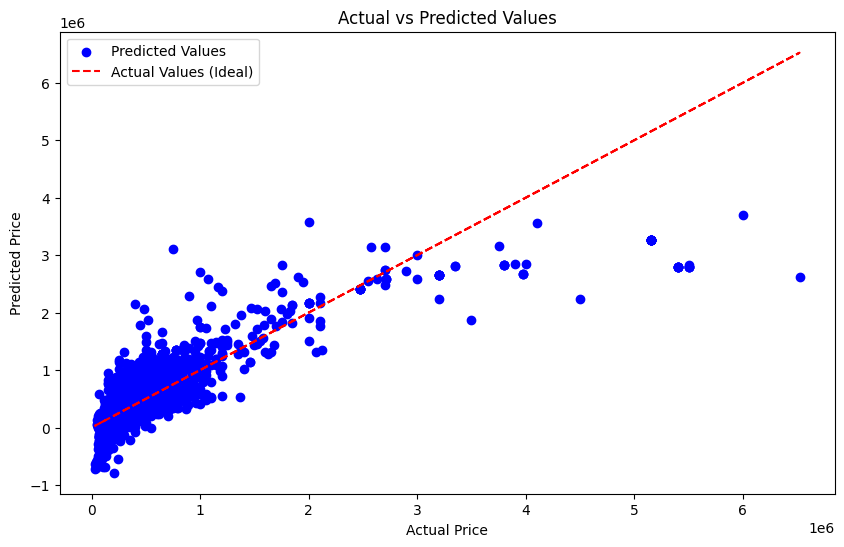

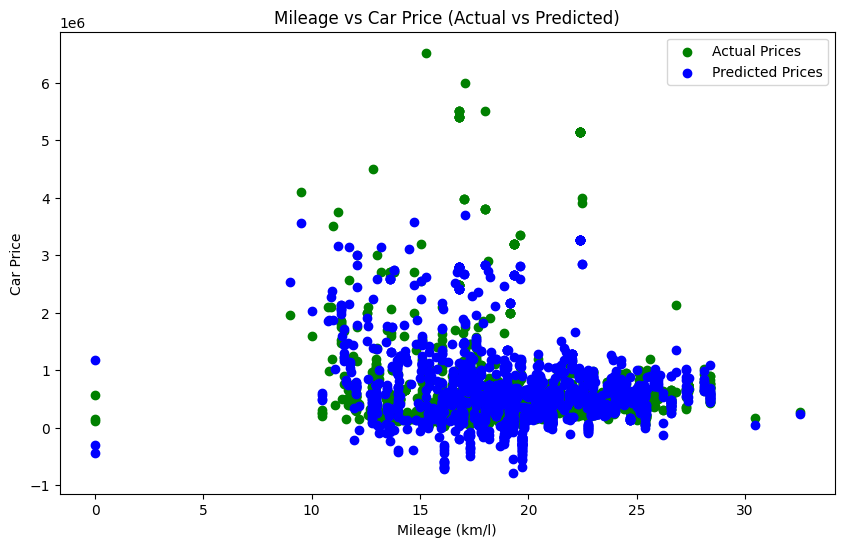

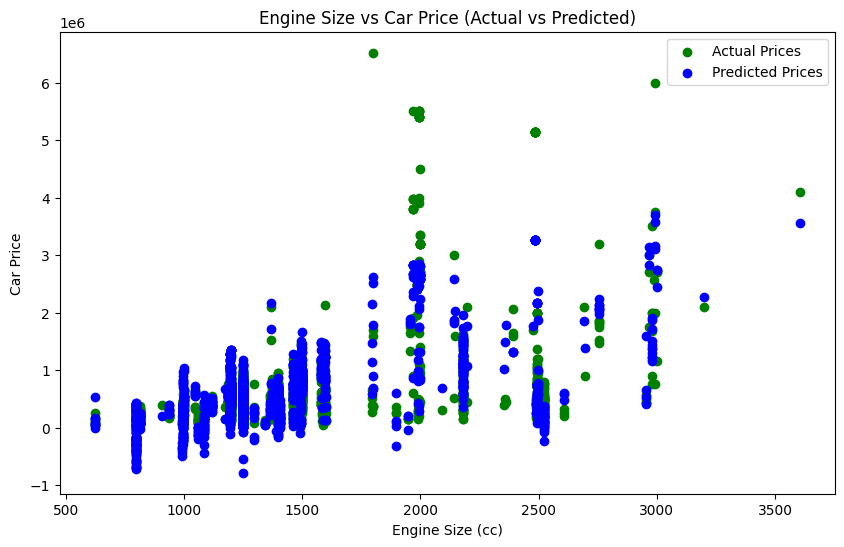

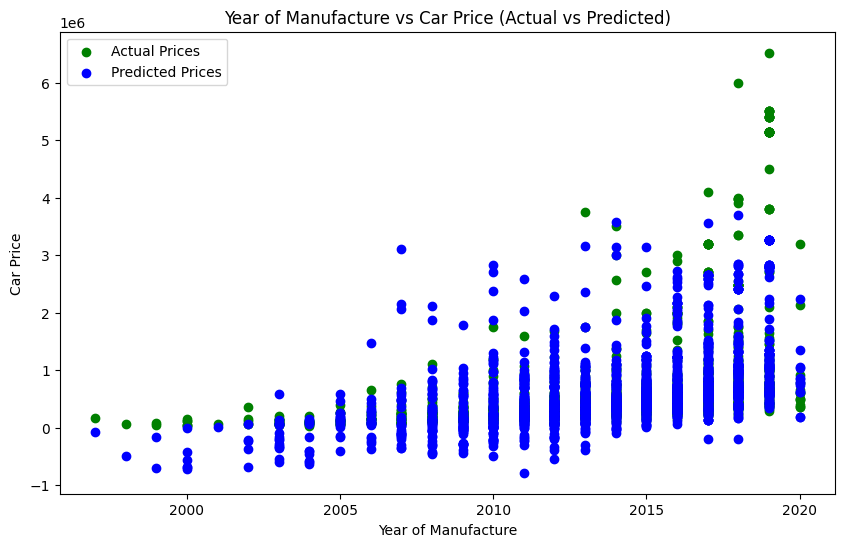

In [ ]:
# 1. Create a DataFrame to compare actual vs predicted values and calculate residuals
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Residuals': y_test.values - predictions,
    'Mileage': X_test['mileage'],
    'Engine': X_test['engine'],
    'Year': X_test['year']
})

# Display the first few rows
display(results_df.head(20))

# 2. Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', label='Predicted Values')
plt.plot(results_df['Actual'], results_df['Actual'], color='red', linestyle='--', label='Actual Values (Ideal)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# 3. Scatter Plot: Mileage vs Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Mileage'], results_df['Actual'], color='green', label='Actual Prices')
plt.scatter(results_df['Mileage'], results_df['Predicted'], color='blue', label='Predicted Prices')
plt.title('Mileage vs Car Price (Actual vs Predicted)')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

# 4. Scatter Plot: Engine Size vs Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Engine'], results_df['Actual'], color='green', label='Actual Prices')
plt.scatter(results_df['Engine'], results_df['Predicted'], color='blue', label='Predicted Prices')
plt.title('Engine Size vs Car Price (Actual vs Predicted)')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Car Price')
plt.legend()
plt.show()

# 5. Scatter Plot: Year vs Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Year'], results_df['Actual'], color='green', label='Actual Prices')
plt.scatter(results_df['Year'], results_df['Predicted'], color='blue', label='Predicted Prices')
plt.title('Year of Manufacture vs Car Price (Actual vs Predicted)')
plt.xlabel('Year of Manufacture')
plt.ylabel('Car Price')
plt.legend()
plt.show()